In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px
import random as random
import requests
from bs4 import BeautifulSoup
import pandas as pd
from sklearn.linear_model import LinearRegression

In [3]:
df=pd.read_csv('checkpoint_3.csv')
df['ListingByYear'] = df.apply(lambda row: row.month[:4], axis = 1)
df.drop('Unnamed: 0.2', axis=1, inplace=True)
df.drop('Unnamed: 0.1', axis=1, inplace=True)
df.drop('Unnamed: 0', axis=1, inplace=True)

display(df)

,town,flat_type,flat_model,floor_area_sqm,street_name,resale_price,month,lease_commence_date,storey_range,_id,...,closest_Uni_sch_dist,closest_Uni_sch,num_Uni_sch_1km_radius,closest_mall_dist,closest_mall,num_mall_1km_radius,closest_park_dist,closest_park,num_park_1km_radius,ListingByYear
0,ANG MO KIO,2 ROOM,Improved,44.0,ANG MO KIO AVE 10,232000.0,2017-01,1979.0,10 TO 12,1,...,7408.201434,Singapore Management University,0,1013.992058,AMK Hub,0,1032.586022,Ang Mo Kio Town Garden East,0,2017
1,ANG MO KIO,3 ROOM,New Generation,67.0,ANG MO KIO AVE 4,250000.0,2017-01,1978.0,01 TO 03,2,...,8371.125772,Singapore University of Social Sciences,0,894.265975,Broadway Plaza,1,658.451197,Ang Mo Kio Town Garden West,2,2017
2,ANG MO KIO,3 ROOM,New Generation,67.0,ANG MO KIO AVE 5,262000.0,2017-01,1980.0,01 TO 03,3,...,8802.805943,Singapore University of Social Sciences,0,1525.573038,Broadway Plaza,0,1111.238041,Ang Mo Kio Town Garden West,0,2017
3,ANG MO KIO,3 ROOM,New Generation,68.0,ANG MO KIO AVE 10,265000.0,2017-01,1980.0,04 TO 06,4,...,7897.637286,Singapore Management University,0,893.795634,myVillage At Serangoon Garden,1,898.087299,Ang Mo Kio Town Garden East,1,2017
4,ANG MO KIO,3 ROOM,New Generation,67.0,ANG MO KIO AVE 5,265000.0,2017-01,1980.0,01 TO 03,5,...,8807.296192,Singapore University of Social Sciences,0,1569.306143,Broadway Plaza,0,1155.199842,Ang Mo Kio Town Garden West,0,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149321,YISHUN,EXECUTIVE,Maisonette,146.0,YISHUN CTRL,800000.0,2023-03,1988.0,10 TO 12,149322,...,13379.711491,Singapore University of Social Sciences,0,432.877723,Junction Nine,2,279.490328,Yishun Pond Park,1,2023
149322,YISHUN,EXECUTIVE,Maisonette,146.0,YISHUN RING RD,800000.0,2023-03,1988.0,01 TO 03,149323,...,13232.047301,Singapore University of Social Sciences,0,931.337725,Wisteria Mall,2,661.649827,Yishun Pond Park,1,2023
149323,YISHUN,EXECUTIVE,Apartment,142.0,YISHUN RING RD,770000.0,2023-03,1988.0,04 TO 06,149324,...,13428.149563,Singapore Institute of Technology,0,739.745345,Junction Nine,1,825.343534,Yishun Pond Park,1,2023
149324,YISHUN,EXECUTIVE,Maisonette,146.0,YISHUN RING RD,818000.0,2023-03,1987.0,10 TO 12,149325,...,11979.803115,Singapore University of Social Sciences,0,965.509600,Northpoint City,1,976.514291,Sembawang Park,1,2023


<h1> Sorting data by region </h1>
<p> According to an article written by Royal Institute of Technology, geographical factors influences real estate prices. Given Singapore's small geographic size, our team has hypothesised that the region of housing influences the resale price. </p>

<cite>https://www.diva-portal.org/smash/get/diva2:1065489/FULLTEXT01.pdf</cite>

In [4]:
url = 'https://www.citypopulation.de/en/singapore/cities/'
page = requests.get(url)
page_preview = BeautifulSoup(page.text, 'lxml')
table1 = page_preview.find('table', id='ts')

In [5]:
headers = []
for i in table1.find_all('th'):
    title = i.text
    headers.append(title)

In [6]:
mydata = pd.DataFrame(columns = headers)
for j in table1.find_all('tr')[1:]:
    row_data = j.find_all('td')
    row = [i.text for i in row_data]
    length = len(mydata)
    mydata.loc[length] = row
mydata["Name"] = mydata["Name"].str.upper()
mydata

,,Name,Adm.,PopulationCensus (C)2000-06-30,PopulationCensus (C)2010-06-30,PopulationEstimate (E)2015-06-30,PopulationCensus (C)2020-06-30,Area,
0,,ANG MO KIO,NE,"180,112","179,297","174,770","162,280",1340,→
1,,BEDOK,E,"284,318","294,519","289,750","276,990",2160,→
2,,BISHAN,C,"89,746","91,298","90,700","87,320",740,→
3,,BUKIT BATOK,W,"126,200","144,198","139,270","158,030",1100,→
4,,BUKIT MERAH,C,"148,299","157,122","155,840","151,250",1410,→
5,,BUKIT PANJANG,W,"96,031","128,734","139,030","138,270",910,→
6,,BUKIT TIMAH,C,"64,361","70,314","74,470","77,860",1730,→
7,,CHANGI,E,"1,085","2,155","2,530","1,850",2270,→
8,,CHOA CHU KANG,W,"136,105","173,291","174,330","192,070",630,→
9,,CLEMENTI,W,"90,864","91,874","91,630","91,990",940,→


Data retrieved from https://www.citypopulation.de/en/singapore/cities/

In [6]:
townRegions = mydata.iloc[:,1:3]
townRegions = townRegions.set_axis(["town", "Region"], axis='columns', inplace=False)
# pd.merge(df, townRegions, on='town', how='left')
# df.head()
town_region_map = dict(zip(townRegions['town'], townRegions['Region']))
df['Region'] = df['town'].map(town_region_map)
df.head()

,town,flat_type,flat_model,floor_area_sqm,street_name,resale_price,month,lease_commence_date,storey_range,_id,...,closest_Uni_sch,num_Uni_sch_1km_radius,closest_mall_dist,closest_mall,num_mall_1km_radius,closest_park_dist,closest_park,num_park_1km_radius,ListingByYear,Region
0,ANG MO KIO,2 ROOM,Improved,44.0,ANG MO KIO AVE 10,232000.0,2017-01,1979.0,10 TO 12,1,...,Singapore Management University,0,1013.992058,AMK Hub,0,1032.586022,Ang Mo Kio Town Garden East,0,2017,NE
1,ANG MO KIO,3 ROOM,New Generation,67.0,ANG MO KIO AVE 4,250000.0,2017-01,1978.0,01 TO 03,2,...,Singapore University of Social Sciences,0,894.265975,Broadway Plaza,1,658.451197,Ang Mo Kio Town Garden West,2,2017,NE
2,ANG MO KIO,3 ROOM,New Generation,67.0,ANG MO KIO AVE 5,262000.0,2017-01,1980.0,01 TO 03,3,...,Singapore University of Social Sciences,0,1525.573038,Broadway Plaza,0,1111.238041,Ang Mo Kio Town Garden West,0,2017,NE
3,ANG MO KIO,3 ROOM,New Generation,68.0,ANG MO KIO AVE 10,265000.0,2017-01,1980.0,04 TO 06,4,...,Singapore Management University,0,893.795634,myVillage At Serangoon Garden,1,898.087299,Ang Mo Kio Town Garden East,1,2017,NE
4,ANG MO KIO,3 ROOM,New Generation,67.0,ANG MO KIO AVE 5,265000.0,2017-01,1980.0,01 TO 03,5,...,Singapore University of Social Sciences,0,1569.306143,Broadway Plaza,0,1155.199842,Ang Mo Kio Town Garden West,0,2017,NE


Text(0.5, 1.0, 'Barplot of mean resale price by region')

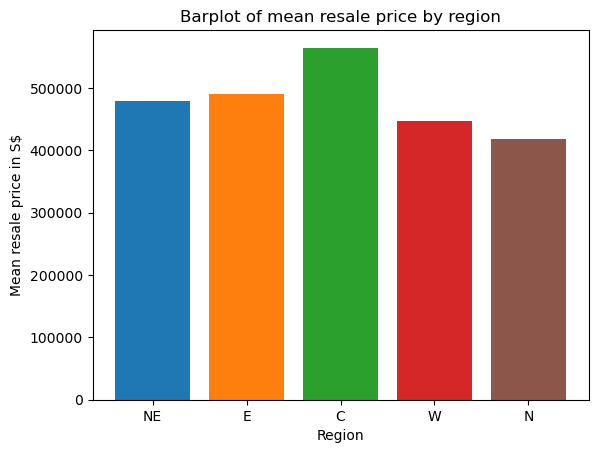

In [7]:
for region in df['Region'].unique():
    temp = df[(df["Region"] == region)]
    mean_price = temp["resale_price"].mean()
    plt.bar(region, mean_price)
    
plt.xlabel("Region")
plt.ylabel("Mean resale price in S$")
plt.title("Barplot of mean resale price by region")

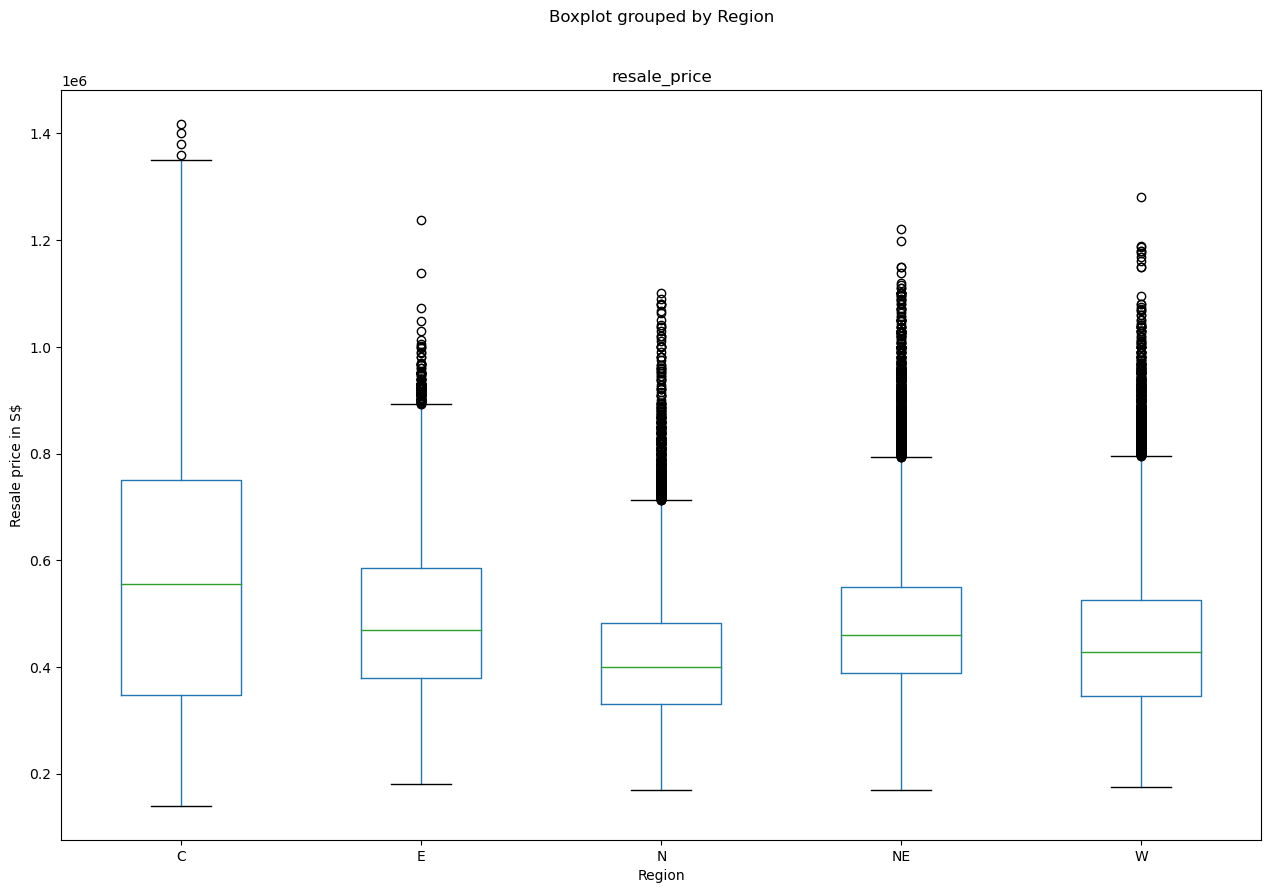

In [8]:
bpbyregion =df.boxplot(by ='Region', column =['resale_price'], grid = False, figsize =(15, 10))

plt.xlabel("Region")
plt.ylabel("Resale price in S$")
plt.show()

In [9]:
dfbyregion = df.groupby("Region")
dfbyregion['resale_price'].describe()

,count,mean,std,min,25%,50%,75%,max
Region,,,,,,,,
C,22645.0,564247.756725,233891.545289,140000.0,348000.0,555000.0,750000.0,1418000.0
E,22703.0,489855.381976,146924.249990,180000.0,380000.0,470000.0,585000.0,1238000.0
N,24344.0,418598.556344,119872.201775,170000.0,330000.0,400000.0,483000.0,1100000.0
NE,39901.0,478737.609704,133903.405605,170000.0,388000.0,460000.0,550000.0,1220000.0
W,34006.0,446803.796896,137955.130422,175000.0,345000.0,428000.0,525000.0,1280000.0


<h3>Analysis of data</h3>
<p>From the analysis above, we can identify that resale price of properties in the central region has a much higher mean and standard deviation compared to the other regions. It also has the highest max price and lowest min price after populating the descriptive statistics. Because of that, our group suspects and hypothesises that there is one town classified under Central region is priced much higher.</p>

In [10]:
central_region = df[(df["Region"] == "C")]

In [11]:
set(central_region['town'])

{'BISHAN',
 'BUKIT MERAH',
 'BUKIT TIMAH',
 'GEYLANG',
 'MARINE PARADE',
 'QUEENSTOWN',
 'TOA PAYOH'}

<AxesSubplot:title={'center':'resale_price'}, xlabel='town'>

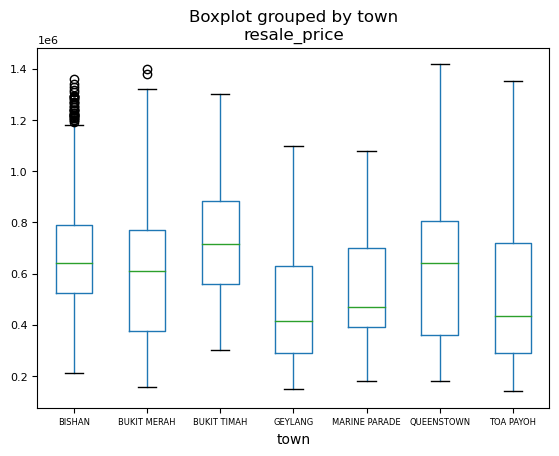

In [12]:
plt.rc('xtick', labelsize=6) 
plt.rc('ytick', labelsize=8) 
central_region.boxplot(by="town", column='resale_price', grid=False)

<h2>Trend in resale prices by year.</h2>
<p>Next, let us look at the resale prices by year to see if there are any patterns that emerge</p>

<Figure size 640x480 with 0 Axes>

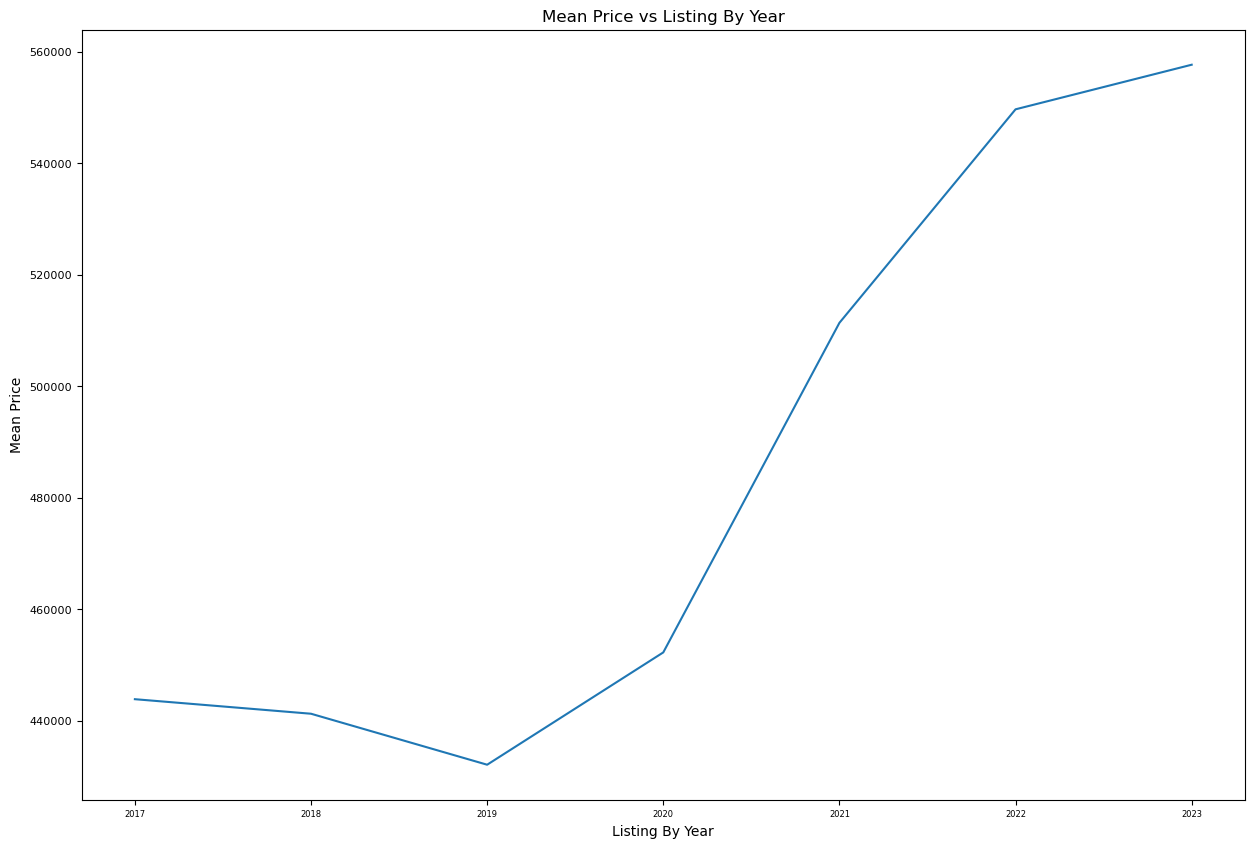

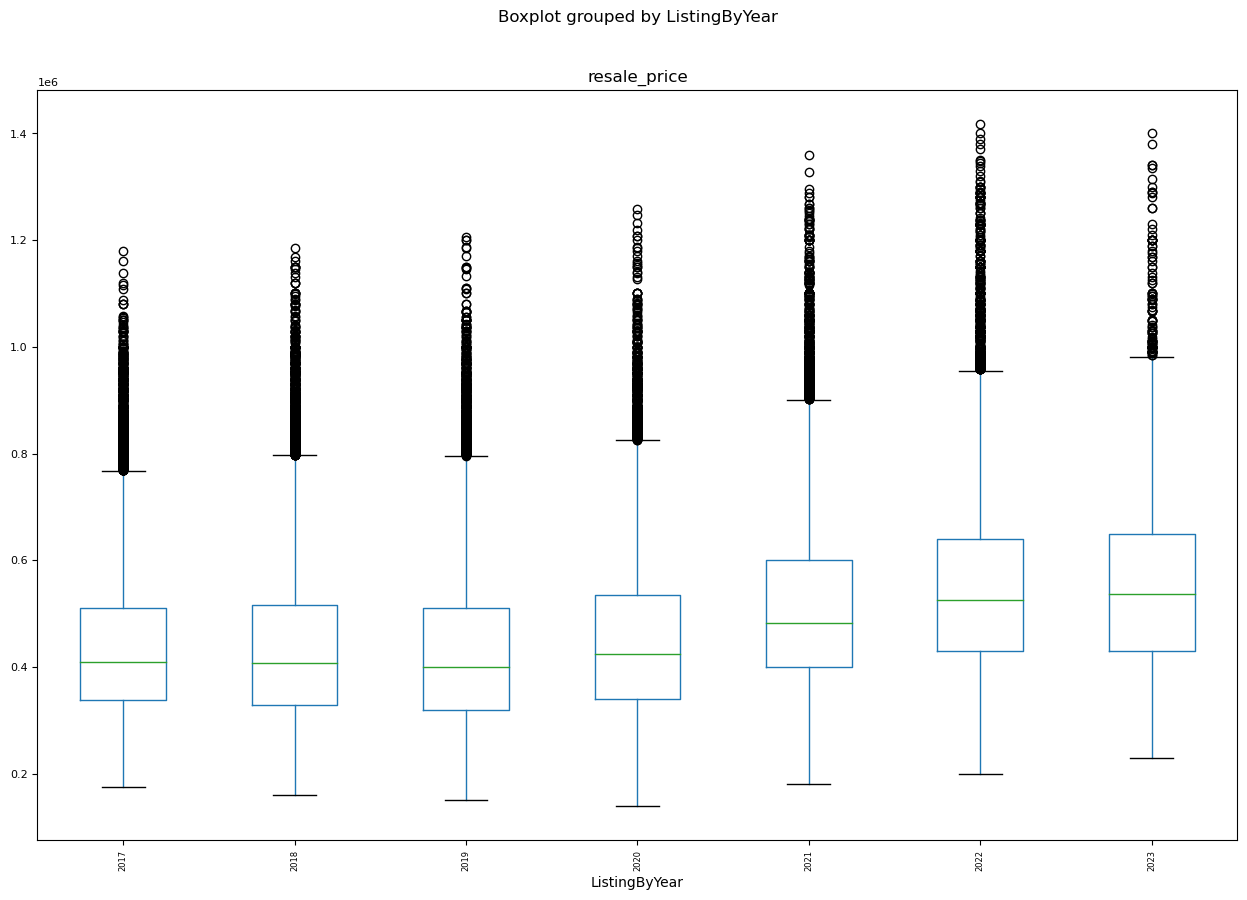

In [13]:
meanleasebyyear = df.groupby(['ListingByYear']).aggregate(np.mean)

plt.clf()
plt.figure(figsize=(15,10))
plt.plot(meanleasebyyear.index,meanleasebyyear['resale_price'])
plt.title('Mean Price vs Listing By Year')
plt.ylabel('Mean Price')
plt.xlabel('Listing By Year')
plt.show()

leasebyyear=df.boxplot(by ='ListingByYear', column =['resale_price'], grid = False, figsize =(15, 10))
plt.xticks(rotation=90)
plt.show()

# display(meanleasebyyear)

<h3>Analysis of results</h3>
<p>We noted the sharp increase in property prices between years 2020 to 2022. The trend prior to that was a decreasing mean price. To shed light to why Housing Prices surged as the COVID-19 pandemic took hold, we found out that a few key attributes include limited supply of new homes (due to pandemic which forced work to be stopped) and greater housing price expectations and momentum as people see owning a house as a valuable and less speculative asset (Federal Reserve Bank of Dallas, 2021)</p>

<cite>https://www.dallasfed.org/research/economics/2021/1228#:~:text=Instead%2C%20the%20combination%20of%20lower,evictions%20pushed%20up%20house%20prices.</cite>

<Figure size 640x480 with 0 Axes>

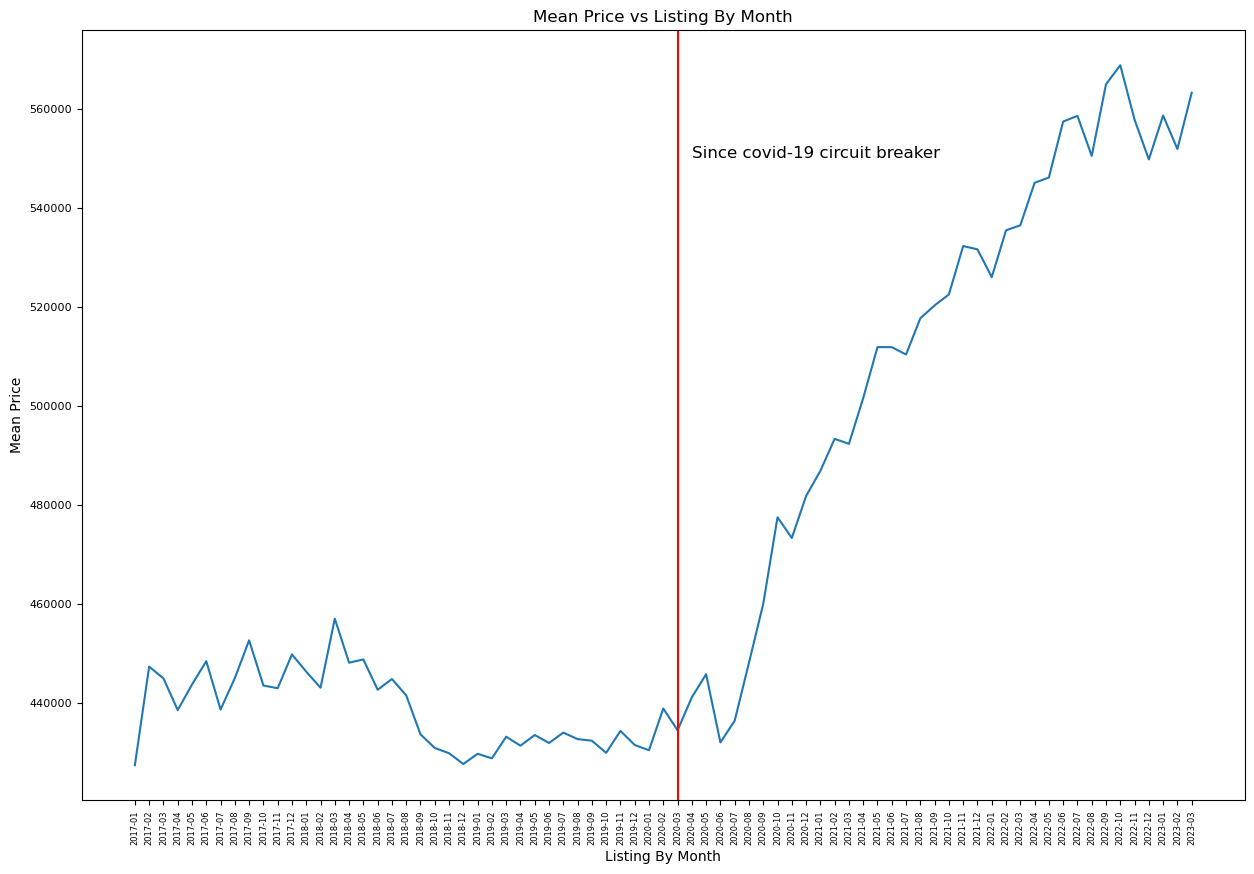

In [14]:
meanleasebymonth = df.groupby(['month']).aggregate(np.mean)

plt.clf()
plt.figure(figsize=(15,10))
plt.plot(meanleasebymonth.index,meanleasebymonth['resale_price'])
plt.title('Mean Price vs Listing By Month')
plt.axvline(x=38, color='red', label="test") #Adding a line on March-2020, which was when Singapore's "Circuit Breaker" started
plt.text(39,550000, "Since covid-19 circuit breaker", fontsize=12)
plt.ylabel('Mean Price')
plt.xlabel('Listing By Month')
plt.xticks(rotation=90)
plt.show()


<h3>Analysis of covid-19 data</h3>
<p>Since the outbreak of covid-19, we noticed that there is a general upward trend in resale prices, which further supports our hypothesis that covid-19 was indeed a catalyst that led to increase in resale prices.</p>

<h2>Multivariate Linear Regression</h2>

<p>One of the key factors influencing housing prices is the amenities available (Lee, 2019). In the next section, we will be using multivariate linear regression to determine if the above statement is true at all based on our data, before we analyse the most valuable amenity (or the distance from amenity that brings about the largest change in resale price). </p>

<cite>https://towardsdatascience.com/data-driven-approach-to-understanding-hdb-resale-prices-in-singapore-31c3beecfd97</cite>

In [15]:
df.columns

Index(['town', 'flat_type', 'flat_model', 'floor_area_sqm', 'street_name',
       'resale_price', 'month', 'lease_commence_date', 'storey_range', '_id',
       'block', 'remaining_lease_mth', 'storey_range_lower', 'address_str',
       'lat_lon', 'closest_mrt_dist', 'closest_mrt', 'num_mrt_1km_radius',
       'closest_Pri_sch_dist', 'closest_Pri_sch', 'num_Pri_sch_1km_radius',
       'closest_Sec_sch_dist', 'closest_Sec_sch', 'num_Sec_sch_1km_radius',
       'closest_JC_sch_dist', 'closest_JC_sch', 'num_JC_sch_1km_radius',
       'closest_MI_sch_dist', 'closest_MI_sch', 'num_MI_sch_1km_radius',
       'closest_Uni_sch_dist', 'closest_Uni_sch', 'num_Uni_sch_1km_radius',
       'closest_mall_dist', 'closest_mall', 'num_mall_1km_radius',
       'closest_park_dist', 'closest_park', 'num_park_1km_radius',
       'ListingByYear', 'Region'],
      dtype='object')

In [16]:
y = df['resale_price']
X = df[['closest_mrt_dist','closest_mall_dist', 'closest_park_dist']]
reg = LinearRegression()
reg.fit(X,y)
coefficients = reg.coef_
intercept = reg.intercept_

In [17]:
coefficients

array([-39.48119295, -27.16254335,  -8.21899858])

In [18]:
intercept

540109.6655620435

<h3>Interpretation of results</h3>

<pre>
The coefficients are as follows:
closest_mrt_dist: -39.48
closest_mall_dist: -27.16
closest_park_dist: -8.22

</pre>

<p>
We can interpret the coefficients as the following- For each increase in 1m distance from specified amenity, how much does the resale_price increase? For example, since coefficient of closest_mrt_dist is -39.48, this means that for every 1m increase in distance from house to mrt, we can expect the resale price to increase by -39.48 dollars (or decrease by 39.48 dollars). The amount may seem insignificant, but we have to note that HDBs are normally situated in clusters. Each clusters could be 100m or more away from each other and the resale price would likey see a greater impact.

From the above analysis, we can see that distance from house to MRT is the most important factor since it has the largest (negative) coefficient, which means we see a bigger price movement if the distance from mrt changes compared to the same distance changed for other amenities, holding all else constant.
</p>

In [7]:
df.head()

,town,flat_type,flat_model,floor_area_sqm,street_name,resale_price,month,lease_commence_date,storey_range,_id,...,closest_Uni_sch_dist,closest_Uni_sch,num_Uni_sch_1km_radius,closest_mall_dist,closest_mall,num_mall_1km_radius,closest_park_dist,closest_park,num_park_1km_radius,ListingByYear
0,ANG MO KIO,2 ROOM,Improved,44.0,ANG MO KIO AVE 10,232000.0,2017-01,1979.0,10 TO 12,1,...,7408.201434,Singapore Management University,0,1013.992058,AMK Hub,0,1032.586022,Ang Mo Kio Town Garden East,0,2017
1,ANG MO KIO,3 ROOM,New Generation,67.0,ANG MO KIO AVE 4,250000.0,2017-01,1978.0,01 TO 03,2,...,8371.125772,Singapore University of Social Sciences,0,894.265975,Broadway Plaza,1,658.451197,Ang Mo Kio Town Garden West,2,2017
2,ANG MO KIO,3 ROOM,New Generation,67.0,ANG MO KIO AVE 5,262000.0,2017-01,1980.0,01 TO 03,3,...,8802.805943,Singapore University of Social Sciences,0,1525.573038,Broadway Plaza,0,1111.238041,Ang Mo Kio Town Garden West,0,2017
3,ANG MO KIO,3 ROOM,New Generation,68.0,ANG MO KIO AVE 10,265000.0,2017-01,1980.0,04 TO 06,4,...,7897.637286,Singapore Management University,0,893.795634,myVillage At Serangoon Garden,1,898.087299,Ang Mo Kio Town Garden East,1,2017
4,ANG MO KIO,3 ROOM,New Generation,67.0,ANG MO KIO AVE 5,265000.0,2017-01,1980.0,01 TO 03,5,...,8807.296192,Singapore University of Social Sciences,0,1569.306143,Broadway Plaza,0,1155.199842,Ang Mo Kio Town Garden West,0,2017


<h2>Trend in distance from schools</h2>
<p>We want to find out if distance from primary schools is a key consideration. This is because of priority admission where Singapore Citizens living within a 1km radius of the primary school will receive a priority in being enroled into the school.</p>
    
<cite>https://www.moe.gov.sg/primary/p1-registration/distance</cite>

In [8]:
df.columns

Index(['town', 'flat_type', 'flat_model', 'floor_area_sqm', 'street_name',
       'resale_price', 'month', 'lease_commence_date', 'storey_range', '_id',
       'block', 'remaining_lease_mth', 'storey_range_lower', 'address_str',
       'lat_lon', 'closest_mrt_dist', 'closest_mrt', 'num_mrt_1km_radius',
       'closest_Pri_sch_dist', 'closest_Pri_sch', 'num_Pri_sch_1km_radius',
       'closest_Sec_sch_dist', 'closest_Sec_sch', 'num_Sec_sch_1km_radius',
       'closest_JC_sch_dist', 'closest_JC_sch', 'num_JC_sch_1km_radius',
       'closest_MI_sch_dist', 'closest_MI_sch', 'num_MI_sch_1km_radius',
       'closest_Uni_sch_dist', 'closest_Uni_sch', 'num_Uni_sch_1km_radius',
       'closest_mall_dist', 'closest_mall', 'num_mall_1km_radius',
       'closest_park_dist', 'closest_park', 'num_park_1km_radius',
       'ListingByYear'],
      dtype='object')

In [35]:
pri_sch_subset = df[["resale_price", "closest_Pri_sch_dist","num_Pri_sch_1km_radius"]]
(pri_sch_subset["closest_Pri_sch_dist"] >= 1000).sum()   # Primary school not within 1km

4612

In [38]:
pri_sch_subset["at_least_1_Pri_sch"] = (pri_sch_subset["num_Pri_sch_1km_radius"] >= 1)
pri_sch_subset

C:\Users\65948\AppData\Local\Temp\ipykernel_4820\2930688101.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pri_sch_subset["at_least_1_Pri_sch"] = (pri_sch_subset["num_Pri_sch_1km_radius"] >= 1)


,resale_price,closest_Pri_sch_dist,num_Pri_sch_1km_radius,at_least_1_Pri_sch
0,232000.0,218.125240,2,True
1,250000.0,257.083533,3,True
2,262000.0,506.849425,3,True
3,265000.0,698.165484,2,True
4,265000.0,546.443513,3,True
...,...,...,...,...
149321,800000.0,342.194936,4,True
149322,800000.0,228.217415,3,True
149323,770000.0,248.725150,2,True
149324,818000.0,421.953894,4,True


<AxesSubplot:title={'center':'resale_price'}, xlabel='at_least_1_Pri_sch'>

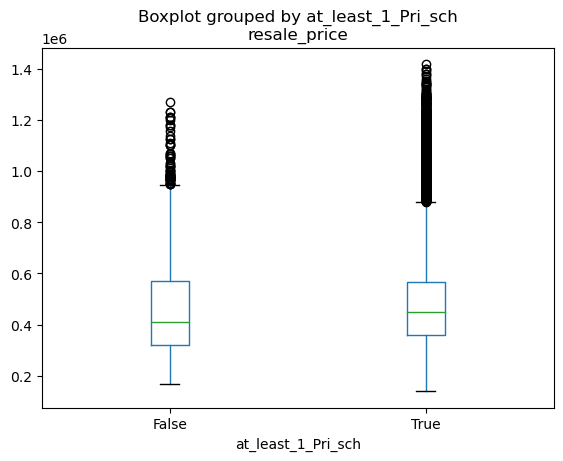

In [43]:
pri_sch_subset.boxplot(by="at_least_1_Pri_sch", column='resale_price', grid=False)